In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data=pd.read_csv('dataset.csv')
data

,Name,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Jupiter Tisserand Invariant,...,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,approach_year,approach_month,approach_day,Orbital Period,Orbit Uncertainity,Hazardous
0,3703080,7.889472e+11,Very Slow,22017.003799,13680.509944,0.419483,163.178711,6.275369e+07,3.899334e+07,NaN,...,2.005764,NaN,264.837533,0.590551,NaN,1.0,1.0,Low,Medium,True
1,3723955,NaN,Slow,65210.346095,40519.173105,NaN,NaN,5.729815e+07,3.560342e+07,NaN,...,1.497352,2.457795e+06,173.741112,0.845330,1995.0,1.0,1.0,Low,NaN,False
2,2446862,7.895520e+11,NaN,27326.560182,16979.661798,0.050956,19.821890,7.622912e+06,4.736658e+06,4.557,...,1.966857,2.458120e+06,NaN,NaN,1995.0,NaN,8.0,Medium,NaN,True
3,3092506,7.901568e+11,Very Slow,40225.948191,24994.839864,NaN,NaN,NaN,2.652237e+07,5.093,...,1.527904,2.457902e+06,68.741007,0.700277,1995.0,NaN,15.0,Low,Medium,False
4,3514799,7.901568e+11,Very Slow,35426.991794,NaN,0.407832,158.646713,6.101082e+07,NaN,5.154,...,NaN,2.457814e+06,NaN,NaN,NaN,NaN,15.0,NaN,Low,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,3759007,1.473318e+12,Slow,79755.354273,49556.875548,NaN,NaN,6.187511e+06,NaN,5.156,...,1.581299,NaN,NaN,NaN,2016.0,9.0,8.0,Low,NaN,False
4530,3759295,NaN,Very Slow,11610.539577,7214.337772,0.006469,2.516399,9.677324e+05,6.013211e+05,NaN,...,NaN,2.458088e+06,NaN,0.884117,NaN,9.0,8.0,NaN,NaN,False
4531,3759714,1.473318e+12,Very Slow,25889.910626,16086.983633,0.061009,NaN,9.126775e+06,5.671115e+06,4.410,...,2.090708,NaN,203.501147,0.521698,2016.0,9.0,8.0,Medium,NaN,False
4532,3759720,NaN,NaN,NaN,25393.489071,0.260760,101.435493,3.900908e+07,2.423912e+07,4.477,...,1.787733,2.458288e+06,NaN,0.543767,2016.0,9.0,8.0,Medium,NaN,False


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534 entries, 0 to 4533
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          4534 non-null   int64  
 1   Epoch Date Close Approach     3280 non-null   float64
 2   Relative Velocity km per sec  3184 non-null   object 
 3   Relative Velocity km per hr   3033 non-null   float64
 4   Miles per hour                3668 non-null   float64
 5   Miss Dist.(Astronomical)      3933 non-null   float64
 6   Miss Dist.(lunar)             3417 non-null   float64
 7   Miss Dist.(kilometers)        3166 non-null   float64
 8   Miss Dist.(miles)             3882 non-null   float64
 9   Jupiter Tisserand Invariant   2802 non-null   float64
 10  Epoch Osculation              3007 non-null   float64
 11  Semi Major Axis               3346 non-null   float64
 12  Asc Node Longitude            3438 non-null   float64
 13  Per

In [39]:
data_num=data.select_dtypes(['int64','float64'])
data_obj=data.select_dtypes(['O','bool'])


In [40]:
data_num.isnull().sum()/data.shape[0]*100

Name                            0.000000
Epoch Date Close Approach      27.657697
Relative Velocity km per hr    33.105426
Miles per hour                 19.100132
Miss Dist.(Astronomical)       13.255404
Miss Dist.(lunar)              24.636083
Miss Dist.(kilometers)         30.172034
Miss Dist.(miles)              14.380238
Jupiter Tisserand Invariant    38.200265
Epoch Osculation               33.678871
Semi Major Axis                26.202029
Asc Node Longitude             24.172916
Perihelion Arg                 25.011028
Aphelion Dist                  17.975298
Perihelion Time                34.494927
Mean Anomaly                   20.247022
Mean Motion                    33.259815
approach_year                  18.063520
approach_month                 33.700926
approach_day                   11.976180
dtype: float64

In [41]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
import pandas as pd

# Make a copy
data_mice_imputed = data_num.copy()

# Initialize IterativeImputer (can use BayesianRidge or DecisionTreeRegressor inside)
mice_imputer = IterativeImputer(random_state=42, max_iter=10)

# Fit and transform
data_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(data_mice_imputed),
                                 columns=data_num.columns)

print("✅ MICE (Iterative) Imputation completed.")


✅ MICE (Iterative) Imputation completed.


In [42]:
data_mice_imputed.isnull().sum()/data.shape[0]*100

Name                           0.0
Epoch Date Close Approach      0.0
Relative Velocity km per hr    0.0
Miles per hour                 0.0
Miss Dist.(Astronomical)       0.0
Miss Dist.(lunar)              0.0
Miss Dist.(kilometers)         0.0
Miss Dist.(miles)              0.0
Jupiter Tisserand Invariant    0.0
Epoch Osculation               0.0
Semi Major Axis                0.0
Asc Node Longitude             0.0
Perihelion Arg                 0.0
Aphelion Dist                  0.0
Perihelion Time                0.0
Mean Anomaly                   0.0
Mean Motion                    0.0
approach_year                  0.0
approach_month                 0.0
approach_day                   0.0
dtype: float64

In [43]:
data_obj

,Relative Velocity km per sec,Orbital Period,Orbit Uncertainity,Hazardous
0,Very Slow,Low,Medium,True
1,Slow,Low,NaN,False
2,NaN,Medium,NaN,True
3,Very Slow,Low,Medium,False
4,Very Slow,NaN,Low,True
...,...,...,...,...
4529,Slow,Low,NaN,False
4530,Very Slow,NaN,NaN,False
4531,Very Slow,Medium,NaN,False
4532,NaN,Medium,NaN,False


In [44]:
import pandas as pd

# Make a copy to preserve the original
data_obj_imputed = data_obj.copy()

# Loop through each column and impute missing values
for col in data_obj_imputed.columns:
    if data_obj_imputed[col].isnull().any():
        if data_obj_imputed[col].dtype == 'bool':
            # Fill with mode or default value (you can customize this)
            mode_val = data_obj_imputed[col].mode()[0]
            data_obj_imputed[col].fillna(mode_val, inplace=True)
            print(f"Filled NaNs in boolean column '{col}' with MODE → {mode_val}")
        else:
            # For object or category: use most frequent value
            mode_val = data_obj_imputed[col].mode()[0]
            data_obj_imputed[col].fillna(mode_val, inplace=True)
            print(f"Filled NaNs in categorical column '{col}' with MODE → '{mode_val}'")


Filled NaNs in categorical column 'Relative Velocity km per sec' with MODE → 'Slow'
Filled NaNs in categorical column 'Orbital Period' with MODE → 'Low'
Filled NaNs in categorical column 'Orbit Uncertainity' with MODE → 'Low'


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20944\1078464313.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_obj_imputed[col].fillna(mode_val, inplace=True)


In [45]:
data_obj_imputed.isnull().sum()/data.shape[0]*100

Relative Velocity km per sec    0.0
Orbital Period                  0.0
Orbit Uncertainity              0.0
Hazardous                       0.0
dtype: float64

In [46]:
data_obj_imputed['Relative Velocity km per sec'].value_counts()

Relative Velocity km per sec
Slow         2805
Very Slow    1319
Fast          353
Very Fast      57
Name: count, dtype: int64

In [47]:
# Define the mapping for ordinal encoding
velocity_mapping = {
    'Very Slow': 0,
    'Slow': 1,
    'Fast': 2,
    'Very Fast': 3
}

# Apply the mapping
data_obj_imputed['Relative Velocity km per sec'] = data_obj_imputed['Relative Velocity km per sec'].map(velocity_mapping)




In [48]:
data_obj_imputed

,Relative Velocity km per sec,Orbital Period,Orbit Uncertainity,Hazardous
0,0,Low,Medium,True
1,1,Low,Low,False
2,1,Medium,Low,True
3,0,Low,Medium,False
4,0,Low,Low,True
...,...,...,...,...
4529,1,Low,Low,False
4530,0,Low,Low,False
4531,0,Medium,Low,False
4532,1,Medium,Low,False


In [49]:
data_obj_imputed['Orbital Period'].value_counts()

Orbital Period
Low       3135
Medium     917
High       482
Name: count, dtype: int64

In [50]:
# Define ordinal mapping
orbital_period_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

# Apply the mapping
data_obj_imputed['Orbital Period'] = data_obj_imputed['Orbital Period'].map(orbital_period_mapping)

# View the result



In [52]:
data_obj_imputed['Orbit Uncertainity'].value_counts()

Orbit Uncertainity
Low       3214
High       671
Medium     649
Name: count, dtype: int64

In [53]:
# Define the ordinal mapping
uncertainty_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

# Apply the mapping
data_obj_imputed['Orbit Uncertainity'] = data_obj_imputed['Orbit Uncertainity'].map(uncertainty_mapping)




In [54]:
data_obj_imputed

,Relative Velocity km per sec,Orbital Period,Orbit Uncertainity,Hazardous
0,0,0,1,True
1,1,0,0,False
2,1,1,0,True
3,0,0,1,False
4,0,0,0,True
...,...,...,...,...
4529,1,0,0,False
4530,0,0,0,False
4531,0,1,0,False
4532,1,1,0,False


In [55]:
df1=data_obj_imputed.drop(['Hazardous'],axis=1)
y=data_obj_imputed['Hazardous']
df1,y

(      Relative Velocity km per sec  Orbital Period  Orbit Uncertainity
 0                                0               0                   1
 1                                1               0                   0
 2                                1               1                   0
 3                                0               0                   1
 4                                0               0                   0
 ...                            ...             ...                 ...
 4529                             1               0                   0
 4530                             0               0                   0
 4531                             0               1                   0
 4532                             1               1                   0
 4533                             3               0                   1
 
 [4534 rows x 3 columns],
 0        True
 1       False
 2        True
 3       False
 4        True
         ...  
 4529    False
 45

In [58]:
X=pd.concat([data_mice_imputed,df1],axis=1)
X

,Name,Epoch Date Close Approach,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Jupiter Tisserand Invariant,Epoch Osculation,...,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,approach_year,approach_month,approach_day,Relative Velocity km per sec,Orbital Period,Orbit Uncertainity
0,3703080.0,7.889472e+11,22017.003799,13680.509944,0.419483,163.178711,6.275369e+07,3.899334e+07,4.63268,2.457816e+06,...,2.005764,2.457870e+06,264.837533,0.590551,1994.649843,1.000000,1.0,0,0,1
1,3723955.0,1.185044e+12,65210.346095,40519.173105,0.384024,149.515704,5.729815e+07,3.560342e+07,5.46276,2.458000e+06,...,1.497352,2.457795e+06,173.741112,0.845330,1995.000000,1.000000,1.0,1,0,0
2,2446862.0,7.895520e+11,27326.560182,16979.661798,0.050956,19.821890,7.622912e+06,4.736658e+06,4.55700,2.458000e+06,...,1.966857,2.458120e+06,251.651423,0.567107,1995.000000,6.462695,8.0,1,1,0
3,3092506.0,7.901568e+11,40225.948191,24994.839864,0.286647,111.077849,4.268361e+07,2.652237e+07,5.09300,2.458000e+06,...,1.527904,2.457902e+06,68.741007,0.700277,1995.000000,6.791892,15.0,0,0,1
4,3514799.0,7.901568e+11,35426.991794,22013.074692,0.407832,158.646713,6.101082e+07,3.791042e+07,5.15400,2.457883e+06,...,1.553704,2.457814e+06,159.262827,0.726998,1994.639917,6.773887,15.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,3759007.0,1.473318e+12,79755.354273,49556.875548,0.040520,15.296140,6.187511e+06,3.844631e+06,5.15600,2.457638e+06,...,1.581299,2.457746e+06,197.104339,0.764422,2016.000000,9.000000,8.0,1,0,0
4530,3759295.0,1.250958e+12,11610.539577,7214.337772,0.006469,2.516399,9.677324e+05,6.013211e+05,5.64760,2.458000e+06,...,1.687440,2.458088e+06,228.082206,0.884117,2009.242965,9.000000,8.0,0,0,0
4531,3759714.0,1.473318e+12,25889.910626,16086.983633,0.061009,23.205361,9.126775e+06,5.671115e+06,4.41000,2.458000e+06,...,2.090708,2.458032e+06,203.501147,0.521698,2016.000000,9.000000,8.0,0,1,0
4532,3759720.0,1.208020e+12,40867.566448,25393.489071,0.260760,101.435493,3.900908e+07,2.423912e+07,4.47700,2.458273e+06,...,1.787733,2.458288e+06,185.360422,0.543767,2016.000000,9.000000,8.0,1,1,0


In [59]:
X=X.drop(["Name"],axis=1)
X

,Epoch Date Close Approach,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Jupiter Tisserand Invariant,Epoch Osculation,Semi Major Axis,...,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,approach_year,approach_month,approach_day,Relative Velocity km per sec,Orbital Period,Orbit Uncertainity
0,7.889472e+11,22017.003799,13680.509944,0.419483,163.178711,6.275369e+07,3.899334e+07,4.63268,2.457816e+06,1.407011,...,2.005764,2.457870e+06,264.837533,0.590551,1994.649843,1.000000,1.0,0,0,1
1,1.185044e+12,65210.346095,40519.173105,0.384024,149.515704,5.729815e+07,3.560342e+07,5.46276,2.458000e+06,1.107776,...,1.497352,2.457795e+06,173.741112,0.845330,1995.000000,1.000000,1.0,1,0,0
2,7.895520e+11,27326.560182,16979.661798,0.050956,19.821890,7.622912e+06,4.736658e+06,4.55700,2.458000e+06,1.458824,...,1.966857,2.458120e+06,251.651423,0.567107,1995.000000,6.462695,8.0,1,1,0
3,7.901568e+11,40225.948191,24994.839864,0.286647,111.077849,4.268361e+07,2.652237e+07,5.09300,2.458000e+06,1.254823,...,1.527904,2.457902e+06,68.741007,0.700277,1995.000000,6.791892,15.0,0,0,1
4,7.901568e+11,35426.991794,22013.074692,0.407832,158.646713,6.101082e+07,3.791042e+07,5.15400,2.457883e+06,1.225615,...,1.553704,2.457814e+06,159.262827,0.726998,1994.639917,6.773887,15.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,1.473318e+12,79755.354273,49556.875548,0.040520,15.296140,6.187511e+06,3.844631e+06,5.15600,2.457638e+06,1.161429,...,1.581299,2.457746e+06,197.104339,0.764422,2016.000000,9.000000,8.0,1,0,0
4530,1.250958e+12,11610.539577,7214.337772,0.006469,2.516399,9.677324e+05,6.013211e+05,5.64760,2.458000e+06,1.264497,...,1.687440,2.458088e+06,228.082206,0.884117,2009.242965,9.000000,8.0,0,0,0
4531,1.473318e+12,25889.910626,16086.983633,0.061009,23.205361,9.126775e+06,5.671115e+06,4.41000,2.458000e+06,1.528234,...,2.090708,2.458032e+06,203.501147,0.521698,2016.000000,9.000000,8.0,0,1,0
4532,1.208020e+12,40867.566448,25393.489071,0.260760,101.435493,3.900908e+07,2.423912e+07,4.47700,2.458273e+06,1.403663,...,1.787733,2.458288e+06,185.360422,0.543767,2016.000000,9.000000,8.0,1,1,0


In [60]:
from sklearn.preprocessing import MinMaxScaler


# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform the entire numeric X dataframe
X_normalized_array = scaler.fit_transform(X)

# Convert back to DataFrame with original column names
X_normalized = pd.DataFrame(X_normalized_array, columns=X.columns)

# Optional: preview
print(X_normalized.head())


   Epoch Date Close Approach  Relative Velocity km per hr  Miles per hour  \
0                   0.000000                     0.130487        0.130487   
1                   0.578775                     0.401336        0.401336   
2                   0.000884                     0.163781        0.163781   
3                   0.001767                     0.244668        0.244668   
4                   0.001767                     0.214576        0.214577   

   Miss Dist.(Astronomical)  Miss Dist.(lunar)  Miss Dist.(kilometers)  \
0                  0.840191           0.835360                0.839102   
1                  0.769713           0.765811                0.766123   
2                  0.107697           0.105626                0.101616   
3                  0.576163           0.570150                0.570624   
4                  0.817035           0.812291                0.815788   

   Miss Dist.(miles)  Jupiter Tisserand Invariant  Epoch Osculation  \
0           0.839102 

In [63]:
y1=pd.get_dummies(y,dtype='float64')

In [64]:
y1

,False,True
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
4529,1.0,0.0
4530,1.0,0.0
4531,1.0,0.0
4532,1.0,0.0


In [67]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Encode y1 if it's boolean
y_encoded = y.astype(int)  # True → 1, False → 0

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Step 3: Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 4: Predictions
y_pred = model.predict(X_test)

# Step 5: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [66]:
y.value_counts()

Hazardous
False    3798
True      736
Name: count, dtype: int64

Best Threshold for F1: 0.18999999999999995
Accuracy: 0.7133406835722161
Confusion Matrix:
 [[554 206]
 [ 54  93]]
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.73      0.81       760
        True       0.31      0.63      0.42       147

    accuracy                           0.71       907
   macro avg       0.61      0.68      0.61       907
weighted avg       0.81      0.71      0.75       907

ROC AUC Score: 0.756140350877193


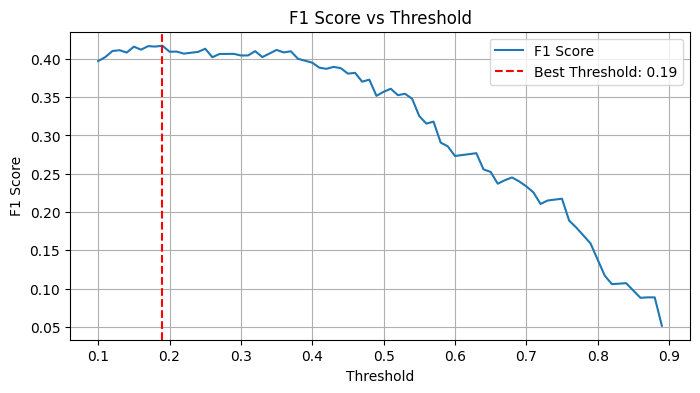

In [94]:
import numpy as np
from sklearn.metrics import f1_score, precision_recall_curve

# Get predicted probabilities
y_probs = best_model.predict_proba(X_test)[:, 1]

# Tune threshold
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = []

for t in thresholds:
    preds = (y_probs >= t).astype(int)
    f1_scores.append(f1_score(y_test, preds))

# Best threshold
best_thresh = thresholds[np.argmax(f1_scores)]
print("Best Threshold for F1:", best_thresh)

# Final predictions
y_pred_thresh = (y_probs >= best_thresh).astype(int)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("Classification Report:\n", classification_report(y_test, y_pred_thresh))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs)) 
plt.figure(figsize=(8, 4))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.axvline(x=best_thresh, color='red', linestyle='--', label=f'Best Threshold: {best_thresh:.2f}')
plt.title("F1 Score vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.legend()
plt.grid(True)
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3038, number of negative: 3038
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4855
[LightGBM] [Info] Number of data points in the train set: 6076, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

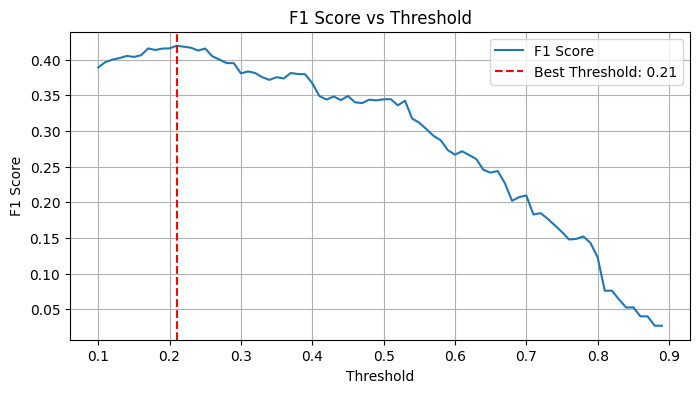

In [92]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, f1_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Train LightGBM model
model = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    learning_rate=0.05,
    n_estimators=300,
    max_depth=7,
    class_weight='balanced',  # help after SMOTE too
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train_sm, y_train_sm)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Threshold tuning using F1
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = [f1_score(y_test, (y_probs >= t).astype(int)) for t in thresholds]
best_thresh = thresholds[np.argmax(f1_scores)]
print("🔍 Best Threshold for F1:", best_thresh)

# Final predictions
y_pred_thresh = (y_probs >= best_thresh).astype(int)

# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))
print("📝 Classification Report:\n", classification_report(y_test, y_pred_thresh))
print("🔵 ROC AUC Score:", roc_auc_score(y_test, y_probs))

# Plot F1 vs Threshold
plt.figure(figsize=(8, 4))
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.axvline(x=best_thresh, color='red', linestyle='--', label=f'Best Threshold: {best_thresh:.2f}')
plt.title("F1 Score vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.legend()
plt.grid(True)
plt.show()
